In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import get_input

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = get_input('./data/payments_prep.csv')

./data/payments_prep.csv: shape = 1023932 rows, 8 cols


In [3]:
df.columns

Index(['prev_application_number', 'application_number',
       'num_instalment_version', 'num_instalment_number', 'days_instalment',
       'days_entry_payment', 'amt_instalment', 'amt_payment'],
      dtype='object')

In [4]:
df['amt_instalment'] = np.log(df['amt_instalment'] + 10)
df['amt_payment'] = np.log(df['amt_payment'] + 10)
df['num_instalment_version'] = np.log(df['num_instalment_version'] + 1)

In [5]:
df.to_csv('./data/payments_prep2.csv', index=False)

In [6]:
# plt.hist(np.log(df['amt_payment'] + 10), bins=25, log=True);

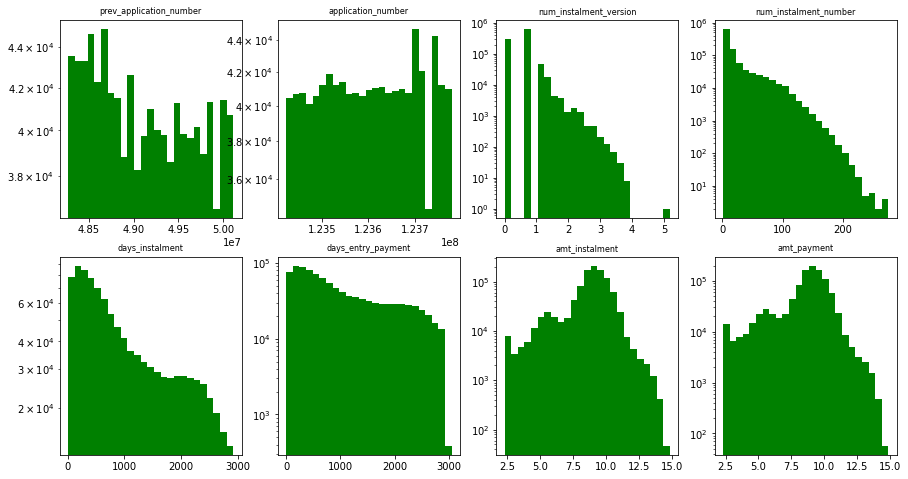

In [7]:
in_line = 4

fig, axes = plt.subplots(2, in_line, figsize=(15, 8))

for num, feature in enumerate(df.columns):
    axes[num//in_line, num%in_line].hist(df[feature].copy(), bins=25, color="green")
    axes[num//in_line, num%in_line].set_yscale('log')
    axes[num//in_line, num%in_line].set_title(feature, fontsize=8)